# Logistic Regression  - advanced

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

### DATASET

https://www.kaggle.com/c/titanic/data

In [2]:
#Read dataset
train = pd.read_csv('./Dataset/titanic_train.csv')

In [3]:
#Head of dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Info about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


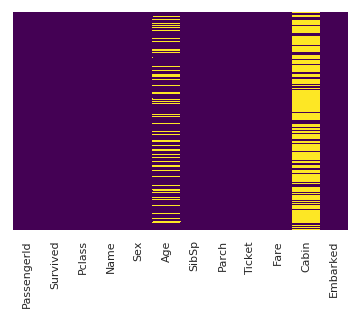

In [5]:
#Show null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

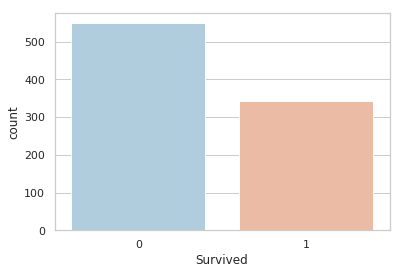

In [6]:
#Set 'whitegrid' style for seaborn
sns.set_style('whitegrid')
#Countplot for 'Survived' column
sns.countplot(x='Survived',data=train,palette='RdBu_r')

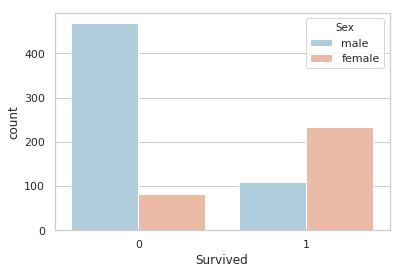

In [7]:
#Countplot for 'Survived' column split by 'Sex' column
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

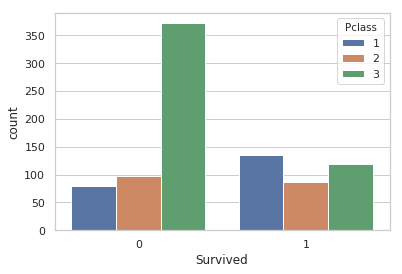

In [8]:
#Countplot for 'Survived' column split by 'Pclass' column
sns.countplot(x='Survived', hue='Pclass', data=train)

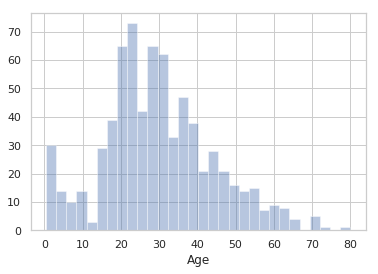

In [9]:
#Drop Null values from 'Age' column
train['Age'].dropna()
#Distplot for 'Age' columns
sns.distplot(train['Age'], kde=False, bins=30)

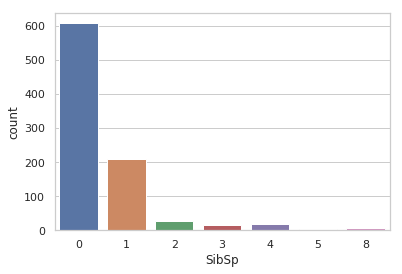

In [10]:
#Countplot for 'SibSp' column
sns.countplot(x='SibSp', data=train)

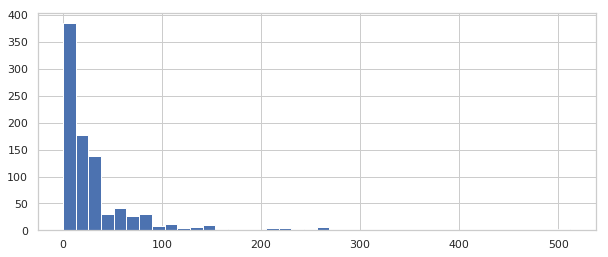

In [11]:
#Histogram for 'Fare' column
train['Fare'].hist(bins=40, figsize=(10,4))

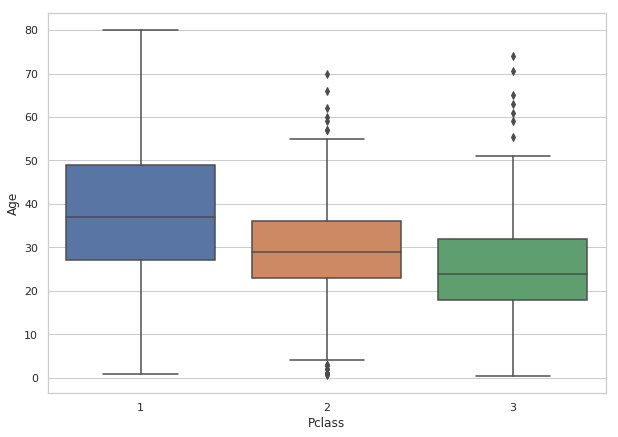

In [12]:
#Create figure
plt.figure(figsize=(10,7))
#Boxplot for 'Pclass' and 'Age' columns
sns.boxplot(x='Pclass', y='Age', data=train)

In [13]:
#Function to fill Null values in 'Age' column based on 'Pclass' column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
#Apply function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

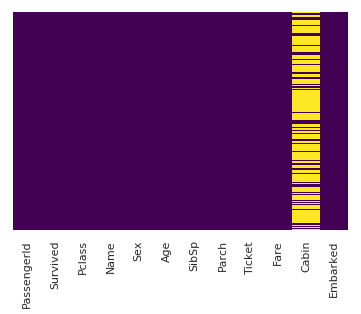

In [15]:
#Show null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
#Dtop 'Cabin' column
train.drop('Cabin', axis=1, inplace=True)

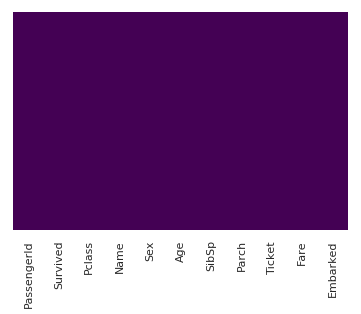

In [17]:
#Show null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
#For sure delete all Null values
train.dropna(inplace=True)

In [19]:
#Create one-hot encode column instead on numerical values in 'Sex' column
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [20]:
#Show new 'Sex' column
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
#Create one-hot encode columns instead on numerical values in 'Embarked' column
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
#Show new 'Embarked' columns
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
#Concat new columns with dataset
train = pd.concat([train, sex, embark], axis=1)

In [24]:
#Show new dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [25]:
#Drop unnecessary columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [26]:
#Data after deleted columns
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
#Split data for training and testing
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Logistic Regression model

In [28]:
#Create Logistic Regression model
logmodel = LogisticRegression()

In [29]:
#Train model
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
#Predict test labels
predictions = logmodel.predict(X_test)

In [31]:
#Show metrics for test dataset
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



[[148  15]
 [ 36  68]]


### Logistic Regression gives good results.